# Hypothesis Images

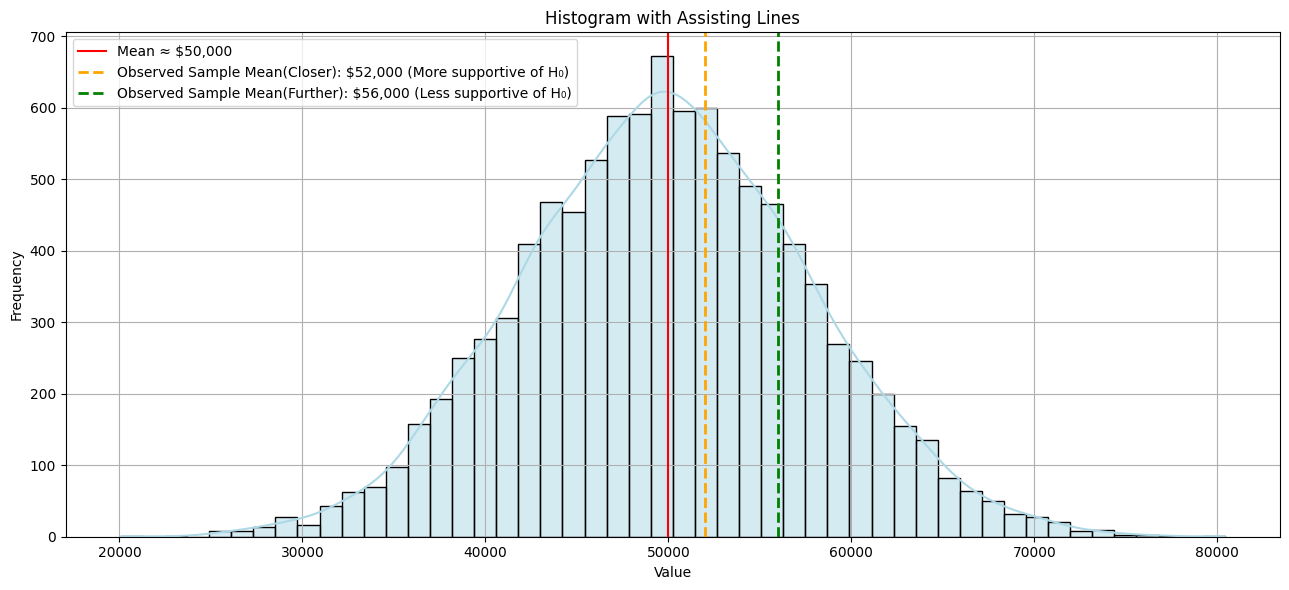

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data
np.random.seed(0)
data = np.random.normal(loc=50000, scale=8000, size=10000)
mean_val = 50000

# Choose two values: one near the mean, one far
closer_value = mean_val + 2000
further_value = mean_val + 6000

# Plot
plt.figure(figsize=(13, 6))
sns.histplot(data, bins=50, kde=True, color='lightblue')

# Draw mean line
plt.axvline(mean_val, color='red', linestyle='-', label=f'Mean ≈ ${mean_val:,.0f}')

# Draw assisting lines
plt.axvline(closer_value, color='orange', linestyle='--', label=f'Observed Sample Mean(Closer): ${closer_value:,.0f} (More supportive of H₀)', linewidth=2)
plt.axvline(further_value, color='green', linestyle='--', label=f'Observed Sample Mean(Further): ${further_value:,.0f} (Less supportive of H₀)', linewidth=2)

# Labels and legend
plt.title('Histogram with Assisting Lines')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Central Limit Theorem Experiment

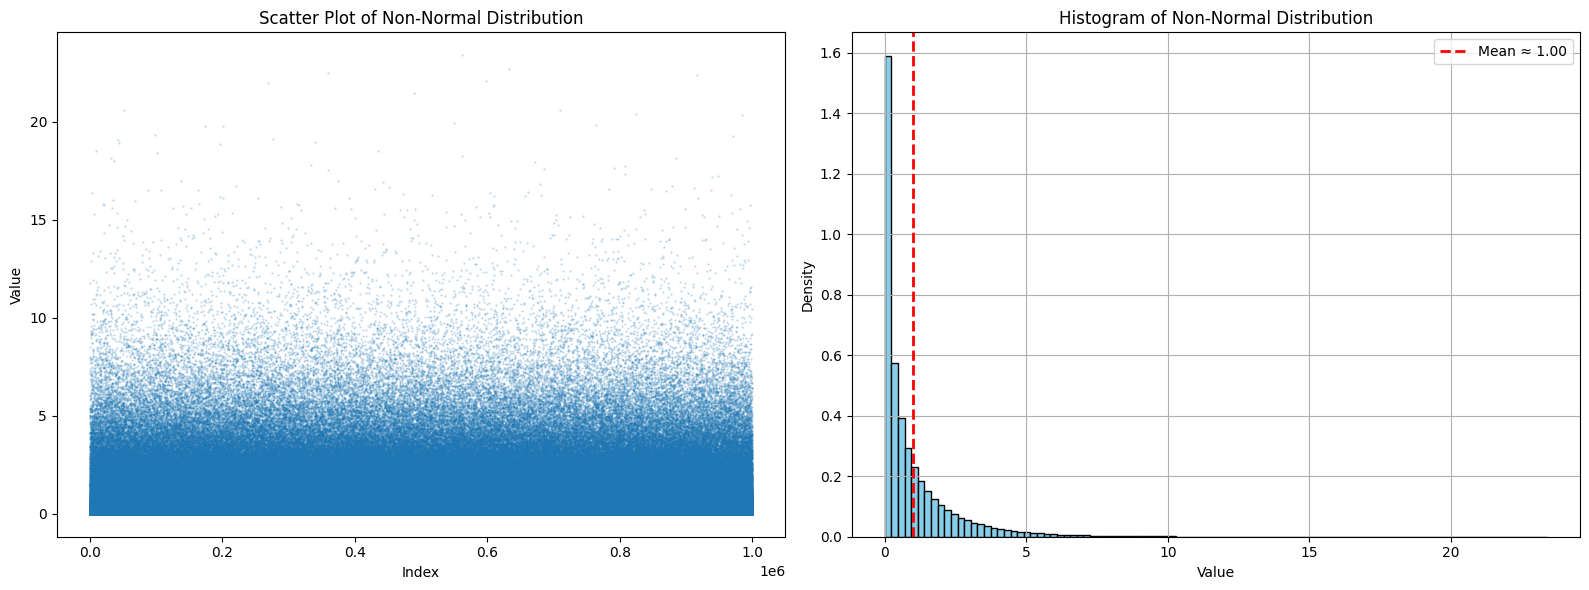

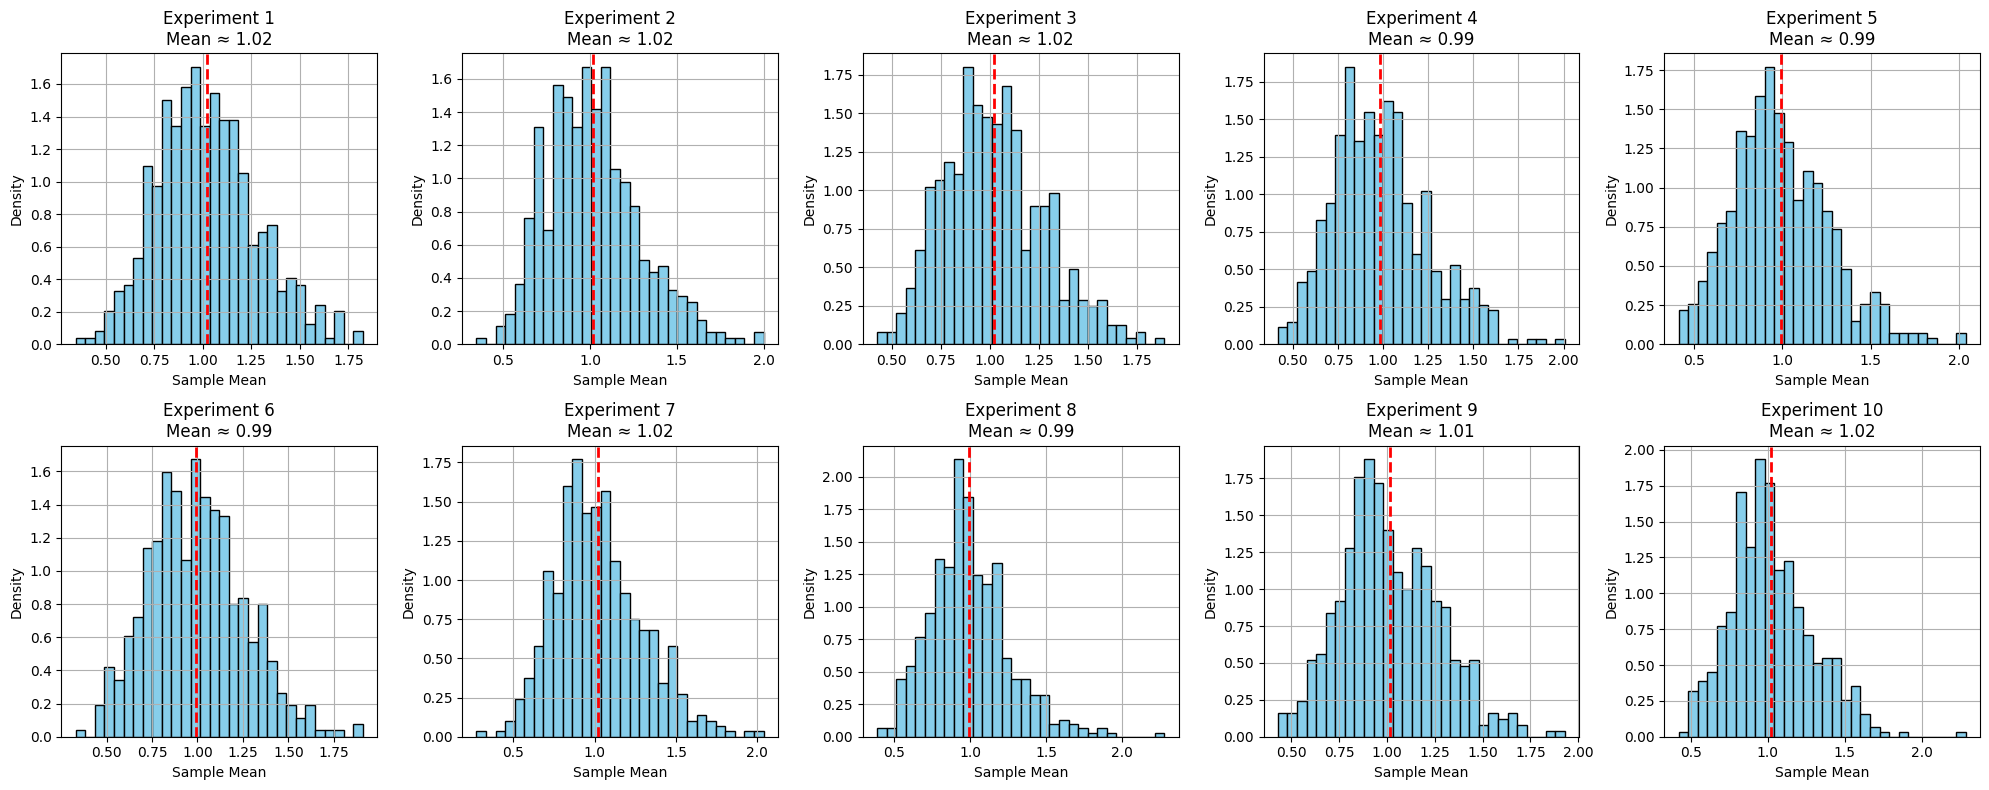

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate population data (not normally distributed)
N = 1_000_000
data = np.random.randn(N)**2  # Skewed, non-normal distribution

# Calculate the mean
mean_val = np.mean(data)

# Plot
plt.figure(figsize=(16, 6))

# Left: scatter plot
plt.subplot(1, 2, 1)
plt.plot(data, '.', alpha=0.3, markersize=1)
plt.title('Scatter Plot of Non-Normal Distribution')
plt.xlabel('Index')
plt.ylabel('Value')

# Right: histogram with mean line
plt.subplot(1, 2, 2)
plt.hist(data, bins=100, density=True, color='skyblue', edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean ≈ {mean_val:.2f}')
plt.title('Histogram of Non-Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Parameters
samplesize = 30
numberOfExps = 500

# Create subplots: 2 rows × 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i in range(10):
    # Generate sample means for this experiment
    samplemeans = np.zeros(numberOfExps)
    for expi in range(numberOfExps):
        sampleidx = np.random.randint(0, N, samplesize)
        samplemeans[expi] = np.mean(data[sampleidx])
    
    # Compute mean of sample means
    mean_of_samplemeans = np.mean(samplemeans)
    
    # Plot histogram
    ax = axes[i]
    ax.hist(samplemeans, bins=30, density=True, color='skyblue', edgecolor='black')
    ax.axvline(mean_of_samplemeans, color='red', linestyle='--', linewidth=2)
    ax.set_title(f'Experiment {i+1}\nMean ≈ {mean_of_samplemeans:.2f}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    ax.grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()

# Null distribution to t-distribution

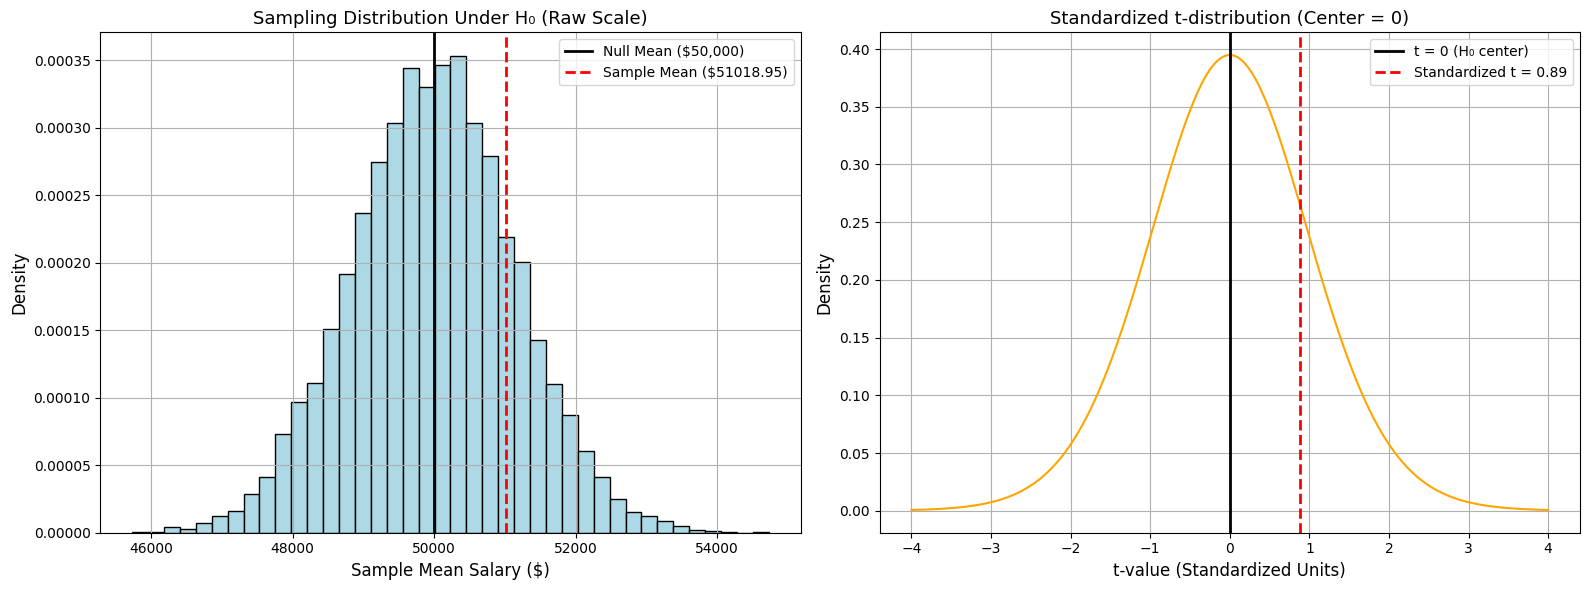

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

simulated_df = pd.read_csv('Simulated_Salary_Data.csv')
# 这里我们假设变量名是 Simulated_Salary
data = simulated_df['Simulated_Salary']  # 或者你手动填上你看到的那一列数据

# Key stats
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
mu_null = 50000
t_value = (sample_mean - mu_null) / (sample_std / np.sqrt(n))
df = n - 1

# Simulate null sampling distribution
null_dist = np.random.normal(loc=mu_null, scale=sample_std/np.sqrt(n), size=10000)

# Generate t-distribution
x = np.linspace(-4, 4, 300)
t_dist = stats.t.pdf(x, df)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Null sampling distribution (raw units)
axes[0].hist(null_dist, bins=40, color='lightblue', edgecolor='black', density=True)
axes[0].axvline(mu_null, color='black', linestyle='-', linewidth=2, label='Null Mean ($50,000)')
axes[0].axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean (${sample_mean:.2f})')
axes[0].set_title('Sampling Distribution Under H₀ (Raw Scale)', fontsize=13)
axes[0].set_xlabel('Sample Mean Salary ($)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Right plot: Standardized t-distribution
axes[1].plot(x, t_dist, color='orange')
axes[1].axvline(0, color='black', linestyle='-', linewidth=2, label='t = 0 (H₀ center)')
axes[1].axvline(t_value, color='red', linestyle='--', linewidth=2, label=f'Standardized t = {t_value:.2f}')
axes[1].set_title('Standardized t-distribution (Center = 0)', fontsize=13)
axes[1].set_xlabel('t-value (Standardized Units)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Critical Value and Significant Level

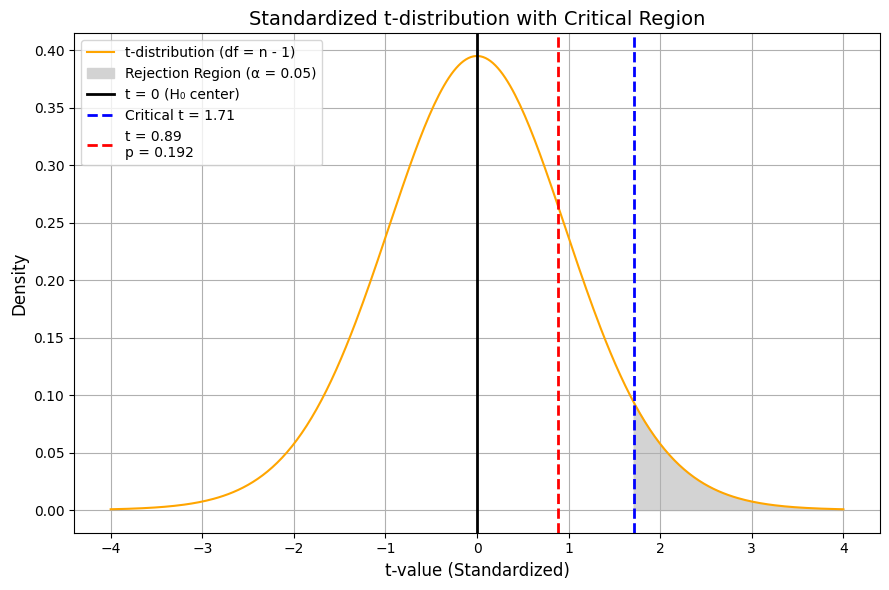

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Stats
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
mu_null = 50000
df = n - 1

# t-test result
t_value = (sample_mean - mu_null) / (sample_std / np.sqrt(n))
p_value = 1 - stats.t.cdf(t_value, df)

# Critical value at α = 0.05 (right-tailed)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df)

# Generate t-distribution
x = np.linspace(-4, 4, 300)
y = stats.t.pdf(x, df)

# Plot
plt.figure(figsize=(9, 6))
plt.plot(x, y, color='orange', label='t-distribution (df = n - 1)')

# Fill rejection region (right-tail)
x_alpha = np.linspace(t_critical, 4, 100)
y_alpha = stats.t.pdf(x_alpha, df)
plt.fill_between(x_alpha, y_alpha, color='lightgray', label=f'Rejection Region (α = {alpha})')

# Lines
plt.axvline(0, color='black', linestyle='-', linewidth=2, label='t = 0 (H₀ center)')
plt.axvline(t_critical, color='blue', linestyle='--', linewidth=2, label=f'Critical t = {t_critical:.2f}')
plt.axvline(t_value, color='red', linestyle='--', linewidth=2, label=f't = {t_value:.2f}\np = {p_value:.3f}')

# Labels
plt.title('Standardized t-distribution with Critical Region', fontsize=14)
plt.xlabel('t-value (Standardized)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()